In [96]:
!nvidia-smi

import os
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
# os.environ["CUDA_VISIBLE_DEVICES"]= "3"

import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import sys
sys.path.append(os.path.abspath('/workspace/sunggu'))
sys.path.append(os.path.abspath('/workspace/sunggu/5.CT_Standardization'))


Mon Sep 27 00:57:20 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.91.03    Driver Version: 460.91.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Quadro RTX 8000     Off  | 00000000:1B:00.0 Off |                  Off |
| 33%   53C    P2    80W / 260W |  43010MiB / 48601MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Quadro RTX 8000     Off  | 00000000:1C:00.0 Off |                  Off |
| 33%   

In [97]:
E_df = pd.read_excel('/workspace/sunggu/5.CT_Standardization/CT표준화_Header_info_수정_spacing.xlsx', engine='openpyxl', index_col=0, sheet_name='Enhance') 
N_df = pd.read_excel('/workspace/sunggu/5.CT_Standardization/CT표준화_Header_info_수정_spacing.xlsx', engine='openpyxl', index_col=0, sheet_name='Non-enhance') 

In [98]:
E_df.head()

,Anonymized ID,Num Files,Patient Age,Gender,Study Date,Manufacturer,Manufacturer's Model Name,Software Versions,Convolution Kernel,Filter Type,KVP,X-ray Tube Current,Slice Thickness,Interval,Pixel Spacing,Unnamed: 16
Num,,,,,,,,,,,,,,,,
000001,IE000001,NaN,061Y,M,20190116,SIEMENS,SOMATOM Definition Edge,syngo CT 2012B,B50f,FLAT,120,312.0,1.000,1,0.66796875\0.66796875,NaN
000001,OE000001,116.0,061Y,M,20181119,SIEMENS,SOMATOM Definition Flash,syngo CT VA48A,B60f,WEDGE_3,100,646.0,3.000,3,0.673828125\0.673828125,NaN
000002,IE000002,NaN,072Y,F,20161027,GE MEDICAL SYSTEMS,LightSpeed VCT,gmp_vct.26,DETAIL,BODY FILTER,120,174.0,0.625,0.625,0.683594\0.683594,NaN
000002,OE000002,306.0,072Y,F,20160512,Philips,Brilliance 64,2.6.2,YB,YB,120,376.0,1.000,1,0.68359375\0.68359375,NaN
000003,IE000003,NaN,059Y,F,20181008,SIEMENS,SOMATOM Definition Edge,syngo CT 2012B,B50f,FLAT,120,194.0,1.000,1,0.6328125\0.6328125,NaN


## Age

In [99]:
def extract_E(x):
    return x.split('0')[0]

In [100]:
E_df['check E'] = E_df['Anonymized ID'].apply(extract_E)
N_df['check E'] = N_df['Anonymized ID'].apply(extract_E)

In [101]:
def To_int(x):
    return int(x.split('Y')[0])

Text(0.5, 1.0, 'Box plot of Patient Age')

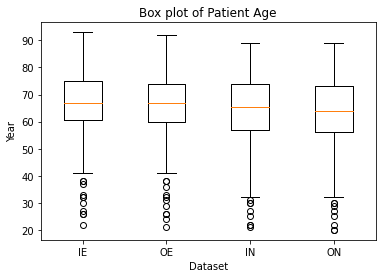

In [102]:
a = E_df[E_df['check E'] == 'IE']['Patient Age'].apply(To_int).values
b = E_df[E_df['check E'] == 'OE']['Patient Age'].apply(To_int).values
c = N_df[N_df['check E'] == 'IN']['Patient Age'].apply(To_int).values
d = N_df[N_df['check E'] == 'ON']['Patient Age'].apply(To_int).values

plt.boxplot([a,b,c,d])
plt.xticks([1, 2, 3, 4], ['IE', 'OE', 'IN', 'ON'])
# plt.boxplot([a,b])
# plt.xticks([1, 2], ['IE', 'OE'])
plt.xlabel('Dataset')
plt.ylabel('Year')
plt.title('Box plot of Patient Age')

## Gender

In [103]:
E_df['check E'] = E_df['Anonymized ID'].apply(extract_E)
N_df['check E'] = N_df['Anonymized ID'].apply(extract_E)

In [104]:
a = E_df[E_df['check E'] == 'IE']['Gender'].values
b = E_df[E_df['check E'] == 'OE']['Gender'].values
c = N_df[N_df['check E'] == 'IN']['Gender'].values
d = N_df[N_df['check E'] == 'ON']['Gender'].values

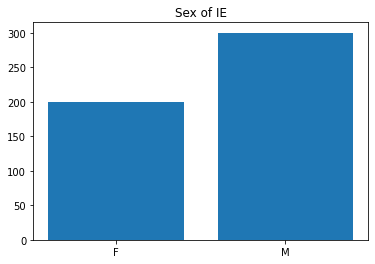

In [105]:
cluster, counts = np.unique(a, return_counts=True)
plt.bar([0, 1], counts)
plt.xticks([0, 1], cluster)
plt.title('Sex of IE')
plt.show()


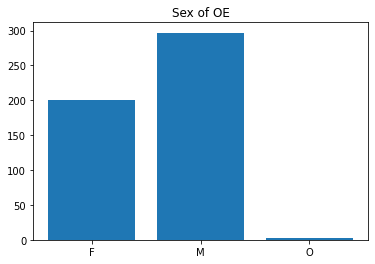

In [106]:
cluster, counts = np.unique(b, return_counts=True)
plt.bar([0, 1, 2], counts)
plt.xticks([0, 1, 2], cluster)
plt.title('Sex of OE')
plt.show()


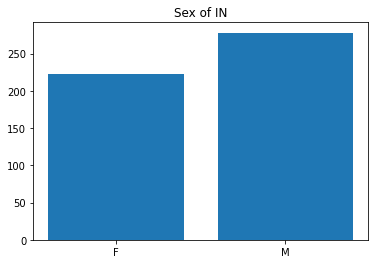

In [107]:
cluster, counts = np.unique(c, return_counts=True)
plt.bar([0, 1], counts)
plt.xticks([0, 1], cluster)
plt.title('Sex of IN')
plt.show()


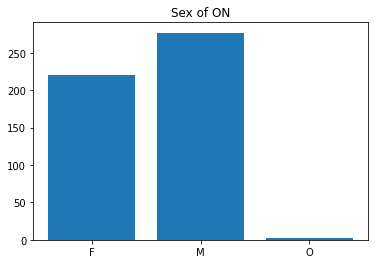

In [108]:
cluster, counts = np.unique(d, return_counts=True)
plt.bar([0, 1, 2], counts)
plt.xticks([0, 1, 2], cluster)
plt.title('Sex of ON')
plt.show()


## Manufacturer

In [109]:
a = E_df[E_df['check E'] == 'IE']['Manufacturer'].values
b = E_df[E_df['check E'] == 'OE']['Manufacturer'].values
c = N_df[N_df['check E'] == 'IN']['Manufacturer'].values
d = N_df[N_df['check E'] == 'ON']['Manufacturer'].values

In [110]:
cluster, counts = np.unique(E_df['Manufacturer'].values, return_counts=True)
df = pd.DataFrame()
df['Manu'] = cluster
df['Count'] = counts 
df

,Manu,Count
0,GE MEDICAL SYSTEMS,269
1,Hitachi Medical Corporation,1
2,INFINITT,2
3,PNMS,1
4,Philips,100
5,SIEMENS,572
6,TOSHIBA,55


In [ ]:
cluster, counts = np.unique(list(map(str, d)), return_counts=True)
df = pd.DataFrame()
df['Manu']  = cluster
df['Count'] = counts 
df

In [ ]:
b = E_df[(E_df['check E'] == 'OE') & (E_df['Manufacturer'] == 'TOSHIBA')]['Convolution Kernel'].values

cluster, counts = np.unique(list(map(str, b)), return_counts=True)
df = pd.DataFrame()
df['Manu']  = cluster
df['Count'] = counts 
df.sort_values("Count")

In [ ]:
df.sort_values("Count")

## Convolution Kernel


In [ ]:
a = E_df[E_df['check E'] == 'IE']['Convolution Kernel'].values
b = E_df[E_df['check E'] == 'OE']['Convolution Kernel'].values
c = N_df[N_df['check E'] == 'IN']['Convolution Kernel'].values
d = N_df[N_df['check E'] == 'ON']['Convolution Kernel'].values

In [ ]:
cluster, counts = np.unique(list(map(str, a)), return_counts=True)
df = pd.DataFrame()
df['Manu']  = cluster
df['Count'] = counts 
df

In [ ]:
cluster, counts = np.unique(list(map(str, b)), return_counts=True)
df = pd.DataFrame()
df['Manu']  = cluster
df['Count'] = counts 
df[df['Count'] > 10]

In [ ]:
cluster, counts = np.unique(list(map(str, c)), return_counts=True)
df = pd.DataFrame()
df['Manu']  = cluster
df['Count'] = counts 
df
# df[df['Count'] > 10]

In [ ]:
cluster, counts = np.unique(list(map(str, d)), return_counts=True)
df = pd.DataFrame()
df['Manu']  = cluster
df['Count'] = counts 

df[df['Count'] > 10]

## Slice Thickness

In [ ]:
a = E_df[E_df['check E'] == 'IE']['Slice Thickness'].values
b = E_df[E_df['check E'] == 'OE']['Slice Thickness'].values
c = N_df[N_df['check E'] == 'IN']['Slice Thickness'].values
d = N_df[N_df['check E'] == 'ON']['Slice Thickness'].values

In [ ]:
cluster, counts = np.unique(list(map(str, a)), return_counts=True)
df = pd.DataFrame()
df['Manu']  = cluster
df['Count'] = counts 
df

In [ ]:
cluster, counts = np.unique(list(map(str, b)), return_counts=True)
df = pd.DataFrame()
df['Manu']  = cluster
df['Count'] = counts 
df

In [ ]:
cluster, counts = np.unique(list(map(str, c)), return_counts=True)
df = pd.DataFrame()
df['Manu']  = cluster
df['Count'] = counts 
df

In [ ]:
cluster, counts = np.unique(list(map(str, d)), return_counts=True)
df = pd.DataFrame()
df['Manu']  = cluster
df['Count'] = counts 
df

## Pixel Spacing


In [ ]:
def extract_spacing(x):
    return x.split('\\')[0]

In [ ]:
a = E_df[E_df['check E'] == 'IE']['Pixel Spacing'].apply(extract_spacing).values
b = E_df[E_df['check E'] == 'OE']['Pixel Spacing'].apply(extract_spacing).values
c = N_df[N_df['check E'] == 'IN']['Pixel Spacing'].apply(extract_spacing).values
d = N_df[N_df['check E'] == 'ON']['Pixel Spacing'].values

In [ ]:
d = d.astype('str')

In [ ]:
d = list(map(extract_spacing, d))

In [ ]:
cluster, counts = np.unique(list(map(str, a)), return_counts=True)
df = pd.DataFrame()
df['Manu']  = cluster
df['Count'] = counts 
df[df['Count'] > 10]

In [ ]:
cluster, counts = np.unique(list(map(str, b)), return_counts=True)
df = pd.DataFrame()
df['Manu']  = cluster
df['Count'] = counts 
df[df['Count'] > 10]

In [ ]:
cluster, counts = np.unique(list(map(str, c)), return_counts=True)
df = pd.DataFrame()
df['Manu']  = cluster
df['Count'] = counts 
df[df['Count'] > 10]

In [ ]:
cluster, counts = np.unique(list(map(str, d)), return_counts=True)
df = pd.DataFrame()
df['Manu']  = cluster
df['Count'] = counts 
df[df['Count'] > 10]

## Interval

In [ ]:
a = E_df[E_df['check E'] == 'IE']['Interval'].values
b = E_df[E_df['check E'] == 'OE']['Interval'].values
c = N_df[N_df['check E'] == 'IN']['Interval'].values
d = N_df[N_df['check E'] == 'ON']['Interval'].values

In [ ]:
cluster, counts = np.unique(list(map(str, a)), return_counts=True)
df = pd.DataFrame()
df['Manu']  = cluster
df['Count'] = counts 
df

In [ ]:
cluster, counts = np.unique(list(map(str, b)), return_counts=True)
df = pd.DataFrame()
df['Manu']  = cluster
df['Count'] = counts 
df[df['Count'] > 10]

In [ ]:
cluster, counts = np.unique(list(map(str, c)), return_counts=True)
df = pd.DataFrame()
df['Manu']  = cluster
df['Count'] = counts 
df[df['Count'] > 10]

In [ ]:
cluster, counts = np.unique(list(map(str, d)), return_counts=True)
df = pd.DataFrame()
df['Manu']  = cluster
df['Count'] = counts 
df[df['Count'] > 10]

## Intensity Hist

In [127]:
import SimpleITK as sitk
import glob

nii_images  = sorted(glob.glob("/workspace/sunggu/5.CT_Standardization/dataset/NII_Pair_CT_dataset/*Enhance/*/*.nii.gz"))

In [128]:
train_intensitiy = [ sitk.GetArrayFromImage(sitk.ReadImage(i)) for i in nii_images ]

In [156]:
# Train
train_hist_dict = dict()
for i in range(-31228, 3074, 1): # Range -1024 ~ 3072
  train_hist_dict[str(i)] = 0

In [158]:
len(nii_images)

1971

In [159]:
for idx in range(len(nii_images)):
  value, counts = np.unique(train_intensitiy[idx].flatten(), return_counts=True)

  for k, v in zip(value, counts):
    train_hist_dict[str(int(k))] += v.item()

KeyboardInterrupt: 

In [ ]:
import pandas as pd

df = pd.DataFrame()
df['intensity'] = list(map(int, train_hist_dict.keys()))
df['freq']      = train_hist_dict.values()

# Data 분포 분석

In [111]:
E_df.head()

,Anonymized ID,Num Files,Patient Age,Gender,Study Date,Manufacturer,Manufacturer's Model Name,Software Versions,Convolution Kernel,Filter Type,KVP,X-ray Tube Current,Slice Thickness,Interval,Pixel Spacing,Unnamed: 16,check E
Num,,,,,,,,,,,,,,,,,
000001,IE000001,NaN,061Y,M,20190116,SIEMENS,SOMATOM Definition Edge,syngo CT 2012B,B50f,FLAT,120,312.0,1.000,1,0.66796875\0.66796875,NaN,IE
000001,OE000001,116.0,061Y,M,20181119,SIEMENS,SOMATOM Definition Flash,syngo CT VA48A,B60f,WEDGE_3,100,646.0,3.000,3,0.673828125\0.673828125,NaN,OE
000002,IE000002,NaN,072Y,F,20161027,GE MEDICAL SYSTEMS,LightSpeed VCT,gmp_vct.26,DETAIL,BODY FILTER,120,174.0,0.625,0.625,0.683594\0.683594,NaN,IE
000002,OE000002,306.0,072Y,F,20160512,Philips,Brilliance 64,2.6.2,YB,YB,120,376.0,1.000,1,0.68359375\0.68359375,NaN,OE
000003,IE000003,NaN,059Y,F,20181008,SIEMENS,SOMATOM Definition Edge,syngo CT 2012B,B50f,FLAT,120,194.0,1.000,1,0.6328125\0.6328125,NaN,IE


In [130]:
import glob
def cut_name(x):
    return x.split('/')[-2]

nii_images  = sorted(glob.glob("/workspace/sunggu/5.CT_Standardization/dataset/NII_Pair_CT_dataset/*Enhance/*/*.nii.gz"))

In [131]:
empty = []
for i in list(map(cut_name, nii_images)):
    if i in E_df[ (E_df['Manufacturer']=='TOSHIBA')]['Anonymized ID'].values:
        empty.append(i)

In [95]:
len(empty)

55

In [89]:
E_df['Manufacturer'].unique()

array(['SIEMENS', 'GE MEDICAL SYSTEMS', 'Philips', 'TOSHIBA', 'INFINITT',
       'PNMS', 'Hitachi Medical Corporation'], dtype=object)

In [56]:
cluster, counts = np.unique(E_df[ (E_df['Manufacturer']=='SIEMENS')]['Convolution Kernel'].values, return_counts=True)
df = pd.DataFrame()
df['Menu']  = cluster
df['Count'] = counts 
df.sort_values("Count", ascending=False)

,Menu,Count
13,B50f,380
3,B31f,30
1,B30f,22
17,B70f,17
14,B50s,13
20,Br49d\2,11
9,B41s,11
26,I40f\2,11
6,B40f,10
15,B60f,10


In [52]:
cluster, counts = np.unique(E_df[ (E_df['Manufacturer']=='SIEMENS') & (E_df['Convolution Kernel']=='B31f') ]['Slice Thickness'].values, return_counts=True)
df = pd.DataFrame()
df['Menu']  = cluster
df['Count'] = counts 
df.sort_values("Count", ascending=False)

,Menu,Count
3,3.0,19
5,5.0,5
0,1.0,2
4,4.0,2
1,1.5,1
2,2.0,1


In [ ]:
E_df['Slice Thickness']

In [53]:
b = E_df[(E_df['check E'] == 'OE') & (E_df['Manufacturer'] == 'TOSHIBA')]['Convolution Kernel'].values

cluster, counts = np.unique(list(map(str, b)), return_counts=True)
df = pd.DataFrame()
df['Manu']  = cluster
df['Count'] = counts 
df.sort_values("Count")

,Manu,Count
1,FC03,1
3,FC07,1
5,FC10,1
11,FC53,1
12,FC55,1
13,FC56,1
14,FC81,1
0,FC01,2
7,FC17,2
10,FC52,2


# Dataset 구성

In [16]:
import numpy as np
import pandas as pd

In [49]:
E_df = pd.read_excel('/workspace/sunggu/5.CT_Standardization/dataset/NII_Pair_CT_dataset/Enhance_O_df.xlsx', engine='openpyxl', index_col=0) 
N_df = pd.read_excel('/workspace/sunggu/5.CT_Standardization/dataset/NII_Pair_CT_dataset/Enhance_X_df.xlsx', engine='openpyxl', index_col=0) 
E_df['Mode'] = 'Train'
N_df['Mode'] = 'Train'

In [50]:
len(E_df[ (E_df['Manufacturer'] == 'SIEMENS') & (E_df['Convolution Kernel'] == 'B50f')])

379

In [51]:
len(E_df[ (E_df['Manufacturer'] == 'SIEMENS') & (E_df['Convolution Kernel'] == 'B30f')])

52

In [52]:
len(E_df[ (E_df['Manufacturer'] == 'SIEMENS') & (E_df['Convolution Kernel'] == 'B70f')])

17

## SIEMENS

##### B50f

In [53]:
test   = E_df[ (E_df['Manufacturer'] == 'SIEMENS') & (E_df['Convolution Kernel'] == 'B50f')].sample(n=3, replace=False, random_state=7)
train  = E_df[ (E_df['Manufacturer'] == 'SIEMENS') & (E_df['Convolution Kernel'] == 'B50f')].drop(test.index)

E_df['Mode'][E_df['Anonymized ID'].isin(test['Anonymized ID'])]  = 'Test'
# E_df['Mode'][~E_df['Anonymized ID'].isin(test['Anonymized ID'])] = 'Train'

##### B30f

In [54]:
test   = E_df[ (E_df['Manufacturer'] == 'SIEMENS') & (E_df['Convolution Kernel'] == 'B30f')].sample(n=3, replace=False, random_state=7)
train  = E_df[ (E_df['Manufacturer'] == 'SIEMENS') & (E_df['Convolution Kernel'] == 'B30f')].drop(test.index)

E_df['Mode'][E_df['Anonymized ID'].isin(test['Anonymized ID'])]  = 'Test'

##### B70f

In [55]:
test   = E_df[ (E_df['Manufacturer'] == 'SIEMENS') & (E_df['Convolution Kernel'] == 'B70f')].sample(n=3, replace=False, random_state=7)
train  = E_df[ (E_df['Manufacturer'] == 'SIEMENS') & (E_df['Convolution Kernel'] == 'B70f')].drop(test.index)

E_df['Mode'][E_df['Anonymized ID'].isin(test['Anonymized ID'])]  = 'Test'


## GE

##### STANDARD

In [56]:
test   = E_df[ (E_df['Manufacturer'] == 'GE MEDICAL SYSTEMS') & (E_df['Convolution Kernel'] == 'STANDARD')].sample(n=3, replace=False, random_state=7)
train  = E_df[ (E_df['Manufacturer'] == 'GE MEDICAL SYSTEMS') & (E_df['Convolution Kernel'] == 'STANDARD')].drop(test.index)

E_df['Mode'][E_df['Anonymized ID'].isin(test['Anonymized ID'])]  = 'Test'


##### DETAIL

In [57]:
test   = E_df[ (E_df['Manufacturer'] == 'GE MEDICAL SYSTEMS') & (E_df['Convolution Kernel'] == 'DETAIL')].sample(n=3, replace=False, random_state=7)
train  = E_df[ (E_df['Manufacturer'] == 'GE MEDICAL SYSTEMS') & (E_df['Convolution Kernel'] == 'DETAIL')].drop(test.index)

E_df['Mode'][E_df['Anonymized ID'].isin(test['Anonymized ID'])]  = 'Test'


##### CHST

In [63]:
test   = E_df[ (E_df['Manufacturer'] == 'GE MEDICAL SYSTEMS') & (E_df['Convolution Kernel'] == 'CHST')].sample(n=3, replace=False, random_state=7)
train  = E_df[ (E_df['Manufacturer'] == 'GE MEDICAL SYSTEMS') & (E_df['Convolution Kernel'] == 'CHST')].drop(test.index)

E_df['Mode'][E_df['Anonymized ID'].isin(test['Anonymized ID'])]  = 'Test'


## Philips

##### YA

In [58]:
test   = E_df[ (E_df['Manufacturer'] == 'Philips') & (E_df['Convolution Kernel'] == 'YA')].sample(n=3, replace=False, random_state=7)
train  = E_df[ (E_df['Manufacturer'] == 'Philips') & (E_df['Convolution Kernel'] == 'YA')].drop(test.index)

E_df['Mode'][E_df['Anonymized ID'].isin(test['Anonymized ID'])]  = 'Test'


##### YC

In [59]:
test   = E_df[ (E_df['Manufacturer'] == 'Philips') & (E_df['Convolution Kernel'] == 'YC')].sample(n=3, replace=False, random_state=7)
train  = E_df[ (E_df['Manufacturer'] == 'Philips') & (E_df['Convolution Kernel'] == 'YC')].drop(test.index)

E_df['Mode'][E_df['Anonymized ID'].isin(test['Anonymized ID'])]  = 'Test'


## TOSHIBA

##### FC08

In [60]:
test   = E_df[ (E_df['Manufacturer'] == 'TOSHIBA') & (E_df['Convolution Kernel'] == 'FC08')].sample(n=3, replace=False, random_state=7)
train  = E_df[ (E_df['Manufacturer'] == 'TOSHIBA') & (E_df['Convolution Kernel'] == 'FC08')].drop(test.index)

E_df['Mode'][E_df['Anonymized ID'].isin(test['Anonymized ID'])]  = 'Test'


##### FC04

In [61]:
test   = E_df[ (E_df['Manufacturer'] == 'TOSHIBA') & (E_df['Convolution Kernel'] == 'FC04')].sample(n=3, replace=False, random_state=7)
train  = E_df[ (E_df['Manufacturer'] == 'TOSHIBA') & (E_df['Convolution Kernel'] == 'FC04')].drop(test.index)

E_df['Mode'][E_df['Anonymized ID'].isin(test['Anonymized ID'])]  = 'Test'


In [68]:
# Save
E_df.to_excel('/workspace/sunggu/5.CT_Standardization/dataset/NII_Pair_CT_dataset/Enhance_O_df.xlsx')

In [69]:
E_df

,Anonymized ID,Manufacturer,Convolution Kernel,Path,Mode
0,IE000001,SIEMENS,B50f,/workspace/sunggu/5.CT_Standardization/dataset...,Train
1,OE000001,SIEMENS,B60f,/workspace/sunggu/5.CT_Standardization/dataset...,Train
2,IE000002,GE MEDICAL SYSTEMS,DETAIL,/workspace/sunggu/5.CT_Standardization/dataset...,Train
3,OE000002,Philips,YB,/workspace/sunggu/5.CT_Standardization/dataset...,Train
4,IE000003,SIEMENS,B50f,/workspace/sunggu/5.CT_Standardization/dataset...,Train
...,...,...,...,...,...
995,OE000498,GE MEDICAL SYSTEMS,STANDARD,/workspace/sunggu/5.CT_Standardization/dataset...,Test
996,IE000499,SIEMENS,B50f,/workspace/sunggu/5.CT_Standardization/dataset...,Train
997,OE000499,SIEMENS,B50f,/workspace/sunggu/5.CT_Standardization/dataset...,Train
998,IE000500,GE MEDICAL SYSTEMS,CHST,/workspace/sunggu/5.CT_Standardization/dataset...,Train


In [76]:
E_df = pd.read_excel('/workspace/sunggu/5.CT_Standardization/dataset/NII_Pair_CT_dataset/Enhance_O_df.xlsx', engine='openpyxl', index_col=0) 

In [77]:
E_df[ (E_df['Manufacturer'] == 'Philips') & (E_df['Mode'] == 'Train')]

,Anonymized ID,Manufacturer,Convolution Kernel,Path,Mode
3,OE000002,Philips,YB,/workspace/sunggu/5.CT_Standardization/dataset...,Train
11,OE000006,Philips,YC,/workspace/sunggu/5.CT_Standardization/dataset...,Train
21,OE000011,Philips,YA,/workspace/sunggu/5.CT_Standardization/dataset...,Train
23,OE000012,Philips,YB,/workspace/sunggu/5.CT_Standardization/dataset...,Train
39,OE000020,Philips,A,/workspace/sunggu/5.CT_Standardization/dataset...,Train
...,...,...,...,...,...
963,OE000482,Philips,YA,/workspace/sunggu/5.CT_Standardization/dataset...,Train
973,OE000487,Philips,YD,/workspace/sunggu/5.CT_Standardization/dataset...,Train
977,OE000489,Philips,YA,/workspace/sunggu/5.CT_Standardization/dataset...,Train
987,OE000494,Philips,YA,/workspace/sunggu/5.CT_Standardization/dataset...,Train


In [83]:
E_df['Manufacturer'].unique()

array(['SIEMENS', 'GE MEDICAL SYSTEMS', 'Philips', 'TOSHIBA', 'INFINITT',
       'PNMS', 'Hitachi Medical Corporation'], dtype=object)

In [78]:
E_df[ (E_df['Manufacturer'] == 'Philips') & (E_df['Mode'] == 'Train')]['Anonymized ID'].values

array(['OE000002', 'OE000006', 'OE000011', 'OE000012', 'OE000020',
       'OE000022', 'OE000028', 'OE000030', 'OE000035', 'OE000046',
       'OE000047', 'OE000059', 'OE000062', 'OE000065', 'OE000066',
       'OE000076', 'OE000078', 'OE000086', 'OE000093', 'OE000097',
       'OE000114', 'OE000115', 'OE000116', 'OE000120', 'OE000130',
       'OE000136', 'OE000158', 'OE000166', 'OE000184', 'OE000189',
       'OE000191', 'OE000197', 'OE000202', 'OE000204', 'OE000205',
       'OE000210', 'OE000215', 'OE000219', 'OE000226', 'OE000227',
       'OE000236', 'OE000238', 'OE000254', 'OE000255', 'OE000256',
       'OE000263', 'OE000264', 'OE000272', 'OE000273', 'OE000280',
       'OE000282', 'OE000284', 'OE000288', 'OE000296', 'OE000297',
       'OE000298', 'OE000305', 'OE000307', 'OE000315', 'OE000317',
       'OE000324', 'OE000331', 'OE000335', 'OE000344', 'OE000347',
       'OE000351', 'OE000353', 'OE000355', 'OE000364', 'OE000366',
       'OE000373', 'OE000380', 'OE000391', 'OE000393', 'OE0004

In [79]:
E_df[ (E_df['Manufacturer'] == 'Philips') & (E_df['Mode'] == 'Train')]['Path'].values

array(['/workspace/sunggu/5.CT_Standardization/dataset/NII_Pair_CT_dataset/Outside_O_Enhance/OE000002/2_chest_post.nii.gz',
       '/workspace/sunggu/5.CT_Standardization/dataset/NII_Pair_CT_dataset/Outside_O_Enhance/OE000006/4_post_33.nii.gz',
       '/workspace/sunggu/5.CT_Standardization/dataset/NII_Pair_CT_dataset/Outside_O_Enhance/OE000011/2_chest_post.nii.gz',
       '/workspace/sunggu/5.CT_Standardization/dataset/NII_Pair_CT_dataset/Outside_O_Enhance/OE000012/4_chest_post.nii.gz',
       '/workspace/sunggu/5.CT_Standardization/dataset/NII_Pair_CT_dataset/Outside_O_Enhance/OE000020/203_e-ax_idose.nii.gz',
       '/workspace/sunggu/5.CT_Standardization/dataset/NII_Pair_CT_dataset/Outside_O_Enhance/OE000022/20290_.nii.gz',
       '/workspace/sunggu/5.CT_Standardization/dataset/NII_Pair_CT_dataset/Outside_O_Enhance/OE000028/9_chest_33.nii.gz',
       '/workspace/sunggu/5.CT_Standardization/dataset/NII_Pair_CT_dataset/Outside_O_Enhance/OE000030/2_post.nii.gz',
       '/workspace/sung

In [82]:
E_df[ (E_df['Manufacturer'] == 'Philips') & (E_df['Mode'] == 'Train')]['Convolution Kernel'].values

array(['YB', 'YC', 'YA', 'YB', 'A', 'YA', 'YA', 'YA', 'YA', 'A', 'C', 'A',
       'A', 'YA', 'YA', 'YB', 'YA', 'YA', 'YA', 'YA', 'YC', 'YC', 'YD',
       'C', 'C', 'SB', 'YA', 'YC', 'YC', 'YC', 'C', 'YA', 'YA', 'YC', 'A',
       'YD', 'YA', 'YA', 'YC', 'YC', 'A', 'YA', 'B', 'YA', 'A', 'YA',
       'YC', 'YA', 'YC', 'A', 'A', 'A', 'C', 'YC', 'YC', 'YA', 'YA', 'YA',
       'SB', 'C', 'A', 'YC', 'B', 'C', 'YB', 'YA', 'YC', 'C', 'F', 'YA',
       'C', 'B', 'B', 'B', 'B', 'YA', 'YA', 'B', 'YA', 'YA', 'B', 'SB',
       'YA', 'A', 'IMR1,SharpPlus', 'YC', 'SB', 'B', 'C', 'YA', 'YD',
       'YA', 'YA', 'YC'], dtype=object)